# 4 Task

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

# https://www.kaggle.com/pablocastilla/predict-house-prices-with-xgboost-regression

# https://chrisalbon.com/machine_learning/preprocessing_structured_data/convert_pandas_categorical_column_into_integers_for_scikit-learn/
# http://pbpython.com/categorical-encoding.html

# https://stackoverflow.com/questions/42196589/any-way-to-get-mappings-of-a-label-encoder-in-python-pandas

# https://habr.com/company/ods/blog/326418/

# https://github.com/itsmuriuki/Predicting-House-prices/blob/master/house%20prices%20prediction.ipynb
# https://github.com/Shreyas3108/house-price-prediction/blob/master/housesales.ipynb

# https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f
# https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878
# https://www.kaggle.com/sociopath00/house-price-prediction-python
# https://www.data-blogger.com/2017/11/29/house-price-prediction-using-random-forest-classifier/
# https://www.ritchieng.com/machine-learning-project-boston-home-prices/
# https://medium.com/africa-creates/predicting-house-prices-using-linear-regression-fe699d091e04
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/leaderboard
# https://www.tensorflow.org/tutorials/keras/basic_regression

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train_ID = train['Id']
test_ID = test['Id']


train.drop('Id',axis =1,inplace = True)

train.drop('Utilities', axis =1,inplace= True) # cause only 2 unique values
train.drop('PoolQC',  axis =1,inplace= True) # ||-|| 3
train.drop('MiscFeature',  axis =1,inplace= True)
train.drop('Alley',  axis =1,inplace= True)
train.drop('Fence',  axis =1,inplace= True)

In [5]:
print ("Train data: \n")
print ("Number of columns: " + str (train.shape[1]))
print ("number of rows: " + str (train.shape[0]))

print('\nTest data: \n')
print ("number of columns:" + str (test.shape[1]))
print ("Number of columns:" +  str (test.shape[0]))

Train data: 

Number of columns: 75
number of rows: 1460

Test data: 

number of columns:80
Number of columns:1459


In [6]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [7]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
#sns.distplot(train.SalePrice,fit=norm);

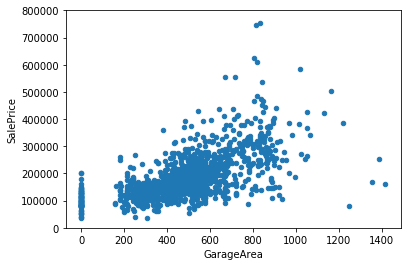

In [9]:
var = 'GarageArea'
data =pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var,y='SalePrice', ylim= (0,800000));
plt.show()

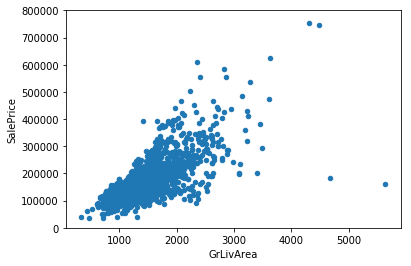

In [10]:
var ='GrLivArea'
data =pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0,800000));
plt.show()

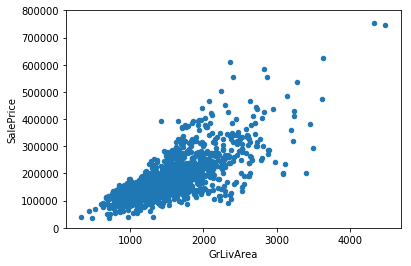

In [11]:
# i think that it outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

var ='GrLivArea'
data =pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0,800000));
plt.show()

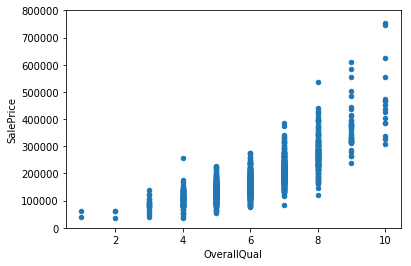

In [12]:
var = 'OverallQual'
data =pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var,y='SalePrice', ylim= (0,800000));
plt.show()

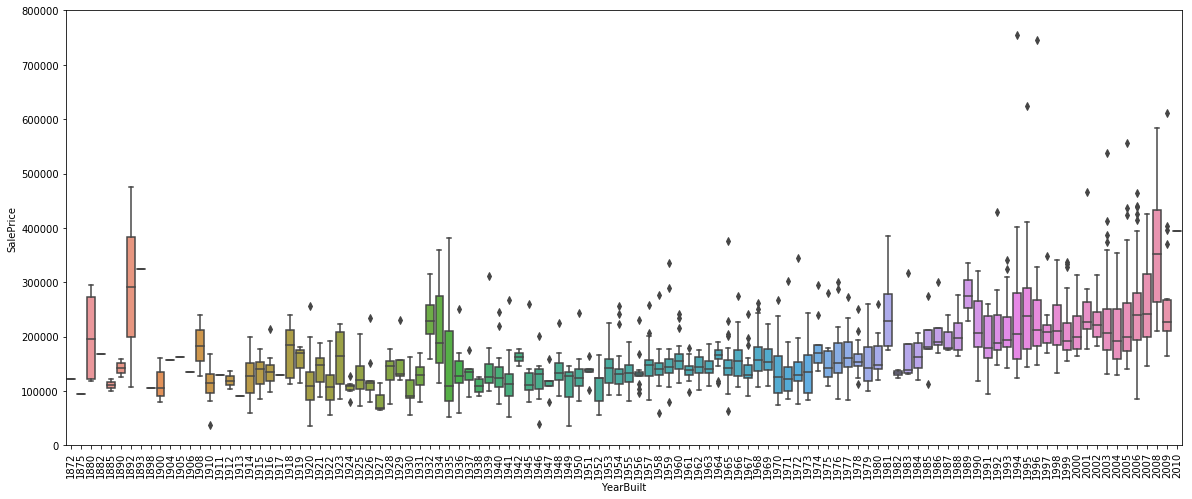

In [13]:
var  = 'YearBuilt'
data= pd.concat([train['SalePrice'], train[var]], axis =1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);
plt.show();

In [14]:
all_data = train.copy()#pd.concat((train.loc[:, 'MSSubClass': 'SaleCondition'],
                     #test.loc[:,'MSSubClass':'SaleCondition']))
print("all_data size is: {} ".format(all_data.shape))
all_data_na = (all_data.isnull().sum()/ len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)
# [:30]
missing_data =pd.DataFrame({'Missing Raio':all_data_na})
missing_data.head(20)

all_data size is: (1458, 75) 


,Missing Raio
FireplaceQu,47.325103
LotFrontage,17.764060
GarageCond,5.555556
GarageQual,5.555556
GarageFinish,5.555556
GarageYrBlt,5.555556
GarageType,5.555556
BsmtFinType2,2.606310
BsmtExposure,2.606310
BsmtFinType1,2.537723


In [15]:
# one_hot = ["PoolQC", "MiscFeature", "Alley", "Fence"]
# all_data = pd.get_dummies(all_data, columns=one_hot)


# onehot PoolQC MiscFeature Alley Fence
# from sklearn.preprocessing import LabelEncoder
# le_color = LabelEncoder()
# le_make = LabelEncoder()
# df['color_encoded'] = le_color.fit_transform(df.color)
# df['make_encoded'] = le_make.fit_transform(df.make)
#all_data["FireplaceQu"].head()
#all_data["FireplaceQu"] = all_data["FireplaceQu"].astype('category')
#all_data["FireplaceQu"].head()
# all_data["FireplaceQu_cat"] = all_data["FireplaceQu"].cat.codes
# all_data["FireplaceQu_cat"].head()


In [16]:
all_data["FireplaceQu"].value_counts()
print(all_data.shape)

(1458, 75)


In [17]:
# all_data = all_data.fillna({"FireplaceQu": "TA"})
# all_data["FireplaceQu"].value_counts()

In [18]:
# all_data["FireplaceQu"] = all_data["FireplaceQu"].astype('category')

In [19]:
# all_data["FireplaceQu"].head()

In [20]:
# all_data["FireplaceQu_cat"] = all_data["FireplaceQu"].cat.codes
# all_data["FireplaceQu_cat"].head()

In [21]:



obj_all_data = all_data.select_dtypes(include=['object']).copy()
for key in obj_all_data.keys():
    all_data[key] = all_data[key].astype('category')
    all_data[key] = all_data[key].cat.codes
    


In [22]:
all_data_na = (all_data.isnull().sum()/ len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)
# [:30]
missing_data =pd.DataFrame({'Missing Raio':all_data_na})
missing_data.head(20)

,Missing Raio
LotFrontage,17.764060
GarageYrBlt,5.555556
MasVnrArea,0.548697


In [23]:

all_data["GarageYrBlt"] = all_data.groupby("Neighborhood")["GarageYrBlt"].transform(
lambda x: x.fillna(x.median()))


all_data["MasVnrArea"] = all_data.groupby("Neighborhood")["MasVnrArea"].transform(
lambda x: x.fillna(x.median()))

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
lambda x: x.fillna(x.median()))
all_data_na = (all_data.isnull().sum()/ len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)
# [:30]
missing_data =pd.DataFrame({'Missing Raio':all_data_na})
missing_data.head(20)

,Missing Raio


In [24]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [25]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(1458, 76)


In [26]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,60,3,65.0,8450,1,3,3,4,0,5,...,0,0,0,0,2,2008,8,4,208500,2566
1,20,3,80.0,9600,1,3,3,2,0,24,...,0,0,0,0,5,2007,8,4,181500,2524
2,60,3,68.0,11250,1,0,3,4,0,5,...,0,0,0,0,9,2008,8,4,223500,2706
3,70,3,60.0,9550,1,0,3,0,0,6,...,0,0,0,0,2,2006,8,0,140000,2473
4,60,3,84.0,14260,1,0,3,2,0,15,...,0,0,0,0,12,2008,8,4,250000,3343


In [27]:
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, auc, accuracy_score

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# RandomForest

In [111]:
print(all_data['SalePrice'].max())
rnd_state = np.random.randint(0, all_data.shape[0])

pred_vars = [v for v in all_data.keys() if v != 'SalePrice']
target_var = 'SalePrice'
all_data.keys()

X = all_data[pred_vars].copy()
y = train.SalePrice.values

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.1, random_state=rnd_state)



forest = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=rnd_state)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))
print(X_train.shape)
print(X_holdout.shape)

755000
0.8875756396528768
(1312, 75)
(146, 75)


In [112]:
forest_params = {'max_depth': [2**i for i in range(1, 7)],
'max_features': [2**i for i in range(1,7)] + [29, X.shape[1]]}

forest_grid = GridSearchCV(forest, forest_params,
cv=5, n_jobs=-1,
verbose=True)
print(forest_params)

{'max_depth': [2, 4, 8, 16, 32, 64], 'max_features': [2, 4, 8, 16, 32, 64, 29, 75]}


In [113]:
forest_grid.fit(X_train, y_train)
print("Fit end")
print(forest_grid.best_params_, forest_grid.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   48.4s finished


Fit end
{'max_depth': 16, 'max_features': 32} 0.8956913799236041


In [114]:

y_pred = forest_grid.predict(X_holdout)
print('MAE:\t$%.2f' % mean_absolute_error(y_holdout, y_pred))
#train
y_pred = forest_grid.predict(X_train)
print('MAE:\t$%.2f' % mean_absolute_error(y_train, y_pred))

MAE:	$14343.18
MAE:	$6113.04


# AdaBoost

In [115]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [116]:
ABR = AdaBoostRegressor(DecisionTreeRegressor(random_state = rnd_state), random_state=rnd_state)

In [117]:
abr_params = {"base_estimator__criterion" : ["mse", "friedman_mse", "mae"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [100*i for i in range(1, 7)]
             }

abr_grid = GridSearchCV(ABR, param_grid=abr_params, cv=5, n_jobs=-1,
verbose=True)
print(abr_params)

{'base_estimator__criterion': ['mse', 'friedman_mse', 'mae'], 'base_estimator__splitter': ['best', 'random'], 'n_estimators': [100, 200, 300, 400, 500, 600]}


In [118]:
abr_grid.fit(X_train, y_train)
print("Fit end")
print(abr_grid.best_params_, abr_grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 39.8min finished


Fit end
{'base_estimator__criterion': 'mae', 'base_estimator__splitter': 'best', 'n_estimators': 200} 0.8956358133721093


In [119]:
y_pred = abr_grid.predict(X_holdout)
print('MAE:\t$%.2f' % mean_absolute_error(y_holdout, y_pred))
#train
y_pred = abr_grid.predict(X_train)
print('MAE:\t$%.2f' % mean_absolute_error(y_train, y_pred))

MAE:	$15075.18
MAE:	$400.78


# XgBoost

In [120]:
import xgboost

xgb = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=rnd_state)

In [121]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=768,
       silent=True, subsample=0.6)

In [122]:
y_pred = xgb.predict(X_holdout)
print('MAE:\t$%.2f' % mean_absolute_error(y_holdout, y_pred))
#train
y_pred = xgb.predict(X_train)
print('MAE:\t$%.2f' % mean_absolute_error(y_train, y_pred))

MAE:	$13277.75
MAE:	$17.23


# CatBoostRegressor

In [123]:
from catboost import Pool, CatBoostRegressor
# initialize data


# specify the training parameters 
cb = CatBoostRegressor(verbose = False)
# #train the model
# model.fit(train_pool)
# # make the prediction using the resulting model
# preds = model.predict(test_pool)
# print(preds)

In [124]:
cb.fit(X_train, y_train)

In [125]:
y_pred = cb.predict(X_holdout)
print('MAE:\t$%.2f' % mean_absolute_error(y_holdout, y_pred))
#train
y_pred = cb.predict(X_train)
print('MAE:\t$%.2f' % mean_absolute_error(y_train, y_pred))

MAE:	$15490.31
MAE:	$12367.23


# lightgbm

In [126]:
import lightgbm as lgb

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_holdout, y_holdout, reference=lgb_train)


In [127]:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=5000,
#                 valid_sets=lgb_eval,
#                 early_stopping_rounds=145,
                verbose_eval = False)

In [128]:

y_pred = gbm.predict(X_holdout, num_iteration=gbm.best_iteration)
print('MAE:\t$%.2f' % mean_absolute_error(y_holdout, y_pred))
#train
y_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration)
print('MAE:\t$%.2f' % mean_absolute_error(y_train, y_pred))

MAE:	$14185.45
MAE:	$7.86


In [136]:
LGBMR = lgb.LGBMRegressor(num_leaves=31)

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'n_estimators': [20, 40, 60],
    'bagging_freq': [5, 10, 15],
    'bagging_fraction': [0.1 * i for i in range(5,9)],
    'feature_fraction': [0.1 * i for i in range(5,9)],
    'num_leaves': [10*i for i in range(2,5)]
}

gbm_grid = GridSearchCV(LGBMR, param_grid, cv=5, n_jobs=-1,
verbose=True)


In [137]:
gbm_grid.fit(X_train, y_train)
print("Fit end")
print(gbm_grid.best_params_, gbm_grid.best_score_)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 29.8min


Fit end
{'bagging_fraction': 0.8, 'bagging_freq': 10, 'feature_fraction': 0.5, 'learning_rate': 0.1, 'n_estimators': 60, 'num_leaves': 40} 0.899889488527126


[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed: 30.6min finished


In [139]:
y_pred = gbm_grid.predict(X_holdout)
print('MAE:\t$%.2f' % mean_absolute_error(y_holdout, y_pred))
#train
y_pred = gbm_grid.predict(X_train)
print('MAE:\t$%.2f' % mean_absolute_error(y_train, y_pred))

MAE:	$14760.43
MAE:	$7949.78
